In [1]:
import matplotlib.pylab as plt
import pandas as pd
import datetime as dt

# Feature Engeneering for Bike Sharing Dataset

In [33]:
# loading of original dataset
data = pd.read_csv('data/kaggle/train.csv', error_bad_lines=False)
test = pd.read_csv('data/kaggle/test.csv', error_bad_lines=False)

In [3]:
def to_date(str_date):
    return dt.datetime.strptime(str_date, '%Y-%m-%d %H:%M:%S')

def to_day_of_year(str_date):
    date = dt.datetime.strptime(str_date, '%Y-%m-%d %H:%M:%S')
    return date.toordinal() - dt.datetime(date.year, 1, 1).toordinal() + 1

def to_month_of_year(str_date):
    date = dt.datetime.strptime(str_date, '%Y-%m-%d %H:%M:%S')
    return date.month

def to_day_of_week(str_date):
    date = dt.datetime.strptime(str_date, '%Y-%m-%d %H:%M:%S')
    return date.weekday()

def to_year(str_date):
    date = dt.datetime.strptime(str_date, '%Y-%m-%d %H:%M:%S')
    return date.year

def to_hour(str_date):
    date = dt.datetime.strptime(str_date, '%Y-%m-%d %H:%M:%S')
    return date.hour

In [34]:
# add date/time features
data.loc[:,'year'] = data['datetime'].map(to_year)
data.loc[:,'month'] = data['datetime'].map(to_month_of_year)
data.loc[:,'weekday'] = data['datetime'].map(to_day_of_week)
data.loc[:,'day'] = data['datetime'].map(to_day_of_year)
data.loc[:,'hour'] = data['datetime'].map(to_hour)
del(data['datetime'])

test.loc[:,'year'] = test['datetime'].map(to_year)
test.loc[:,'month'] = test['datetime'].map(to_month_of_year)
test.loc[:,'weekday'] = test['datetime'].map(to_day_of_week)
test.loc[:,'day'] = test['datetime'].map(to_day_of_year)
test.loc[:,'hour'] = test['datetime'].map(to_hour)
del(test['datetime'])

### Random Forest Classifier
replace zero-values using Random Forest Classifier as per the article [here](https://medium.com/@viveksrinivasan/how-to-finish-top-10-percentile-in-bike-sharing-demand-competition-in-kaggle-part-2-29e854aaab7d).

In [37]:
from sklearn.ensemble import RandomForestClassifier

wCol= ["season","weather","humidity","month","temp","year","atemp"]

dataWind0 = data[data["windspeed"]==0]
dataWindNot0 = data[data["windspeed"]!=0]
dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")

rfModel_wind = RandomForestClassifier()
rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0["windspeed"])
wind0Values = rfModel_wind.predict(X= dataWind0[wCol])
dataWind0["windspeed"] = wind0Values
data = dataWindNot0.append(dataWind0)
data["windspeed"] = data["windspeed"].astype("float")
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


## Add Features from Past

In [45]:
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,weekday,day,hour
0,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,5,1,5
1,1,0,0,1,15.58,19.695,76,16.9979,12,24,36,2011,1,5,1,10
2,1,0,0,1,14.76,16.665,81,19.0012,26,30,56,2011,1,5,1,11
3,1,0,0,1,17.22,21.210,77,19.0012,29,55,84,2011,1,5,1,12
4,1,0,0,2,18.86,22.725,72,19.9995,47,47,94,2011,1,5,1,13


In [44]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,weekday,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,3,20,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,20,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,20,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,20,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,20,4


In [73]:
print(__doc__)

# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

X = data.drop(['casual','registered','count'], axis=1)
y = data['count']

Automatically created module for IPython interactive environment


In [78]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=15)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [80]:
# Predict
X_test = X
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

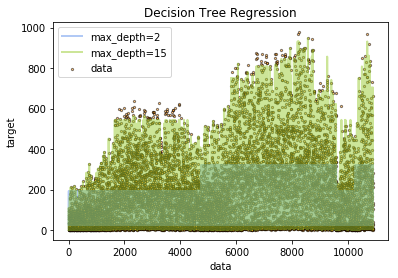

In [89]:
# Plot the results
plt.figure()
plt.scatter(X.index, y, s=5, edgecolor="black", c="darkorange", label="data",alpha=0.5)
plt.plot(X_test.index, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2,alpha=0.5)
plt.plot(X_test.index, y_2, color="yellowgreen", label="max_depth=15", linewidth=2,alpha=0.5)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [90]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_1))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_1))) 

Mean Absolute Error: 98.90591782670423
Mean Squared Error: 19539.342465176986
Root Mean Squared Error: 139.7831980789429


In [91]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_2))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_2))) 

Mean Absolute Error: 7.9547923212899825
Mean Squared Error: 304.1043556312871
Root Mean Squared Error: 17.438588120352147


In [92]:
def rmsle(y, y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [93]:
rmsle(y, y_1)

0.9228020915189369

In [94]:
rmsle(y, y_2)

0.10705715270283216